<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week4/w4_fri_ex1_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab에 불러옵니다.  
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [31]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

--2024-03-29 11:49:22--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2024-03-29 11:49:22--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 172.217.164.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E&export=download [following]
--2024-03-29 11:49:22--  https://drive.usercontent.google.com/download?id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225

## 라이브러리 불러오기
---
아래 셀을 실행시켜 pandas 와 DecisionTreeRegressor 를 불러옵니다.

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

## 데이터 불러오기
---
아래 셀을 실행시켜 csv 파일 데이터를 DataFrame 객체로 불러옵니다.

In [33]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 결측치 제거하기
---
결측치를 제거하고, 결측치가 모두 제거됐는지 확인합니다.

In [34]:
test = test.dropna()
train = train.dropna()

print(train.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64


1. train 데이터중 <br>
(1) 예측해야할 `count` 피쳐를 drop()함수를 사용하고, axis=1 옵션을 사용해 해당 열을 제외한 데이터들을 `X_train` 이라는 이름의 DataFrame 객체로 만들고 <br>
(2) `count` 피쳐만을 데이터로 갖는 `Y_train` 이라는 이름의 DataFrame 객체로 만드는 코드를 아래에 작성하세요

In [35]:
X_train = train.drop(columns='count', axis=1)
Y_train = train[['count']]

In [36]:
X_train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0


In [37]:
Y_train

,count
0,49.0
1,159.0
2,26.0
3,57.0
4,431.0
...,...
1454,21.0
1455,20.0
1456,22.0
1457,216.0


2. `model` 변수명으로 모델을 선언하고, fit() 함수를 사용해서, `X_train` 을 input 으로 삼고, `Y_train` 을 output 으로 삼아 모델을 훈련시키는 코드를 아래에 작성하세요

In [38]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

3. predict() 를 이용해 test data 를 훈련된 모델로 예측한 data 를 생성하고 예측결과 상위 5개를 출력하는 코드를 작성하세요.

In [39]:
pred = model.predict(test)
pred[:5]

array([117., 164., 104.,  49.,  64.])

# Exercise 2

## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [40]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2024-03-29 11:49:23--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2024-03-29 11:49:23--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 172.217.164.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw&export=download [following]
--2024-03-29 11:49:23--  https://drive.usercontent.google.com/download?id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225

In [41]:
# 라이브러리 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [42]:
train = pd.read_csv('data/train.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names_out()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,type_red,type_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


4. sklearn에 model_selection 모듈에서 KFold를 불러와보세요

In [43]:
from sklearn.model_selection import KFold

5. KFold에 n_splits = 5, shuffle = True, random_state = 0이라는 인자를 추가해 "kf"라는 변수에 저장해보세요

In [44]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

6. 반복문을 통해서 1번부터 5번까지의 데이터에 접근해보세요

In [63]:
for train_idx, test_idx in kf.split(train):
  train_data = train.iloc[train_idx]
  print('Train data index: {0}\n'.format(train_idx))
  test_data = train.iloc[test_idx]
  print('Test data index: {0} ...\n'.format(test_idx[:10]))

Train data index: [1100 1101 1102 ... 5494 5495 5496]

Test data index: [0 1 2 3 4 5 6 7 8 9] ...

Train data index: [   0    1    2 ... 5494 5495 5496]

Test data index: [1100 1101 1102 1103 1104 1105 1106 1107 1108 1109] ...

Train data index: [   0    1    2 ... 5494 5495 5496]

Test data index: [2200 2201 2202 2203 2204 2205 2206 2207 2208 2209] ...

Train data index: [   0    1    2 ... 5494 5495 5496]

Test data index: [3299 3300 3301 3302 3303 3304 3305 3306 3307 3308] ...

Train data index: [   0    1    2 ... 4395 4396 4397]

Test data index: [4398 4399 4400 4401 4402 4403 4404 4405 4406 4407] ...



- 추가 코드

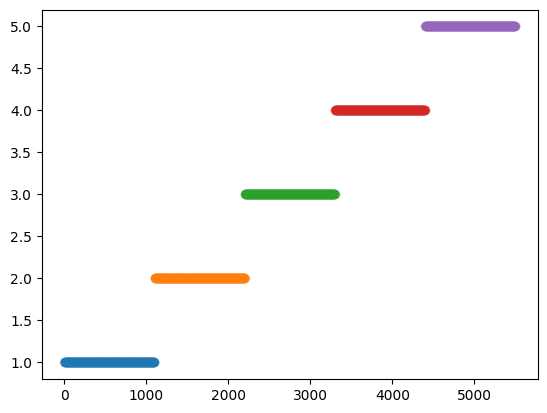

In [64]:
# 문제와 상관없는 추가코드입니다.

import matplotlib.pyplot as plt


kf = KFold(n_splits = 5, shuffle = False)
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train) :
  plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
  i += 1
plt.show()


## 아래의 이미지는 shuffle = False로 했을 때, 데이터가 겹치지 않게 순서대로 쪼개지는 것을 볼 수 있습니다.

- 각 폴드의 값이 순차적으로 나눠진 것 확인

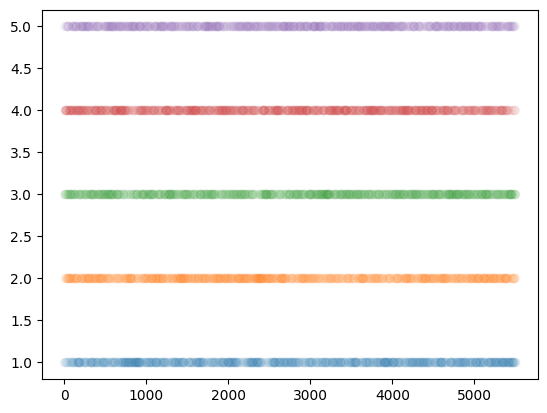

In [65]:
# suffle = True

kf = KFold(n_splits = 5, shuffle = True)
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train) :
  plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.03)
  i += 1
plt.show()

- 5개 폴드의 값들이 random하게 분포